# K-Means make_blobs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(random_state=42)

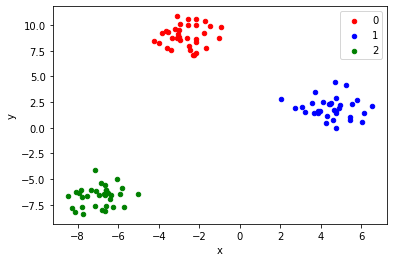

In [3]:
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [4]:
df.head()

,x,y,label
0,-7.726421,-8.394957,2
1,5.453396,0.742305,1
2,-2.978672,9.556846,0
3,6.042673,0.571319,1
4,-6.521840,-6.319325,2


In [5]:
target = df.label
df.drop(['label'], axis=1, inplace=True)

y = target
X = df

In [6]:
## fitting KMeans function to X

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, algorithm='auto')

kmeans.fit(X)

KMeans(n_clusters=3)

In [7]:
## predict 'X' and create predict to compare the actual values of 'y' against predicted ones

correct = 0

pred = kmeans.predict(X)

pred_df = pd.DataFrame({'actual_val':y, 'predict':pred})
pred_df.head()

,actual_val,predict
0,2,1
1,1,0
2,0,2
3,1,0
4,2,1


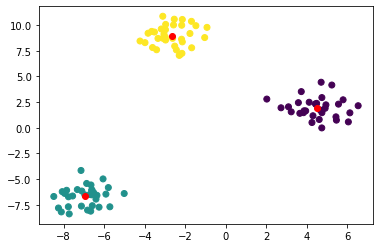

In [8]:
## plot the data

plt.scatter(df.iloc[:,0], df.iloc[:,1], c=pred)

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red')

# K-means 2

# Agglomerative

In [9]:
agg = pd.read_csv('ilustrasi k means.csv', sep=';')
agg.head()

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181


C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tinggibadan', ylabel='tinggibadanistri'>

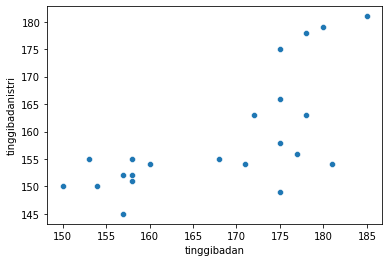

In [11]:
x=agg.iloc[:,0]
y=agg.iloc[:,1]

sb.scatterplot(x, y)

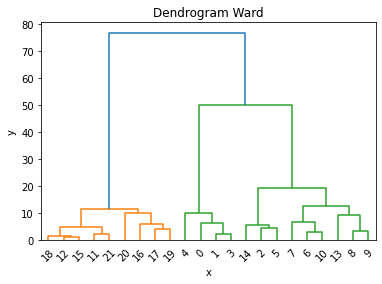

In [12]:
import scipy.cluster.hierarchy as sch

dendro_ward = sch.dendrogram(sch.linkage(agg, method='ward'))

plt.title('Dendrogram Ward')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

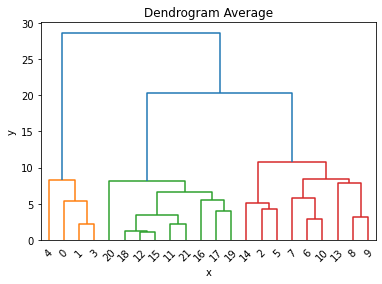

In [13]:
dendro_average = sch.dendrogram(sch.linkage(agg, method='average'))

plt.title('Dendrogram Average')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

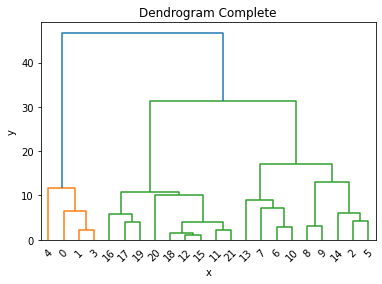

In [14]:
dendro_comp = sch.dendrogram(sch.linkage(agg, method='complete'))

plt.title('Dendrogram Complete')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

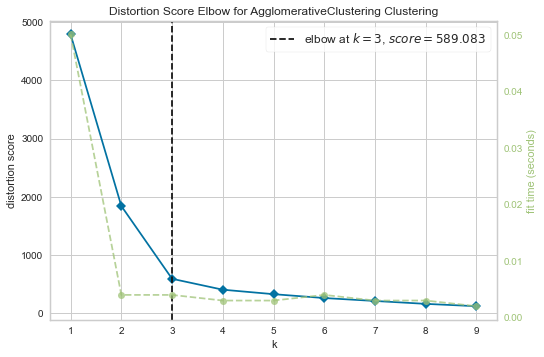

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()

viz = KElbowVisualizer(model, k=(1,10))

viz.fit(agg)

viz.show()

In [23]:
new_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')

y_model = new_model.fit_predict(agg)

agg['cluster'] = pd.DataFrame(y_model)

In [26]:
plt.scatter(agg['cluster' == 0, 0],
            c='red', label='Cluster 1')
plt.scatter(agg['cluster' == 0, 1],
            c='blue', label='Cluster 2')


plt.xlabel('tinggi badan')
plt.ylabel('tinggi badan istri)')
plt.legend()
plt.show()

KeyError: (False, 0)